<a href="https://colab.research.google.com/github/nxthxnael/Machine-Learning-Essentials/blob/master/Practical%20Session%201/Nathanael_Mutua_SC212_0588_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Step 1**

I will import the Iris dataset from the scikit learn library.

> *It contains features for different iris flower species, which the model will learn to categorize.*

- I will run `sklearn.datasets import load_iris`
- I will also import pandas, load the dataset and create a dataframe

Then I will display the first few rows of the dataset.


In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# loading the dataset
iris = load_iris()

In [2]:
# creating a dataframe

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# I'm adding the target column to include the additional information
# (numerical values representing the species)

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


---
---


## **Step 2**
Carrying out the classification algorithms using 5 algorithms.

Where for each, you must follow a standard pipeline: **Train the model, make predictions, display the confusion matrix, and compute performance metrics**.

### **1. K Nearest Neighbour (KNN)**

**Got me wondering what exactlly is KNN?**
KNN is a **"lazy learner"** that does not build a formal model during training; instead, it stores the data and makes decisions during the prediction phase based on the classes of the closest neighbors.

Key considerationsI will have: Use the **"Rule of Thumb"** ($K = \sqrt{n}$) or **Cross-Validation** to select the best value for $K$.

Key steps:
1. import neccessry libraries
2. split the data
3. create the KNN model
4. fit the model
5. make predictions
6. display the confusion matrix
7. compute performance metrics




#### **1.1 Import Libraries**
importing necessary libraries for data handling, model training and evaluation

- `from sklearn.model_selection import train_test_split`

  Purpose: This function is used to split a dataset into two subsets: one for training the model and another for testing it.
- `from sklearn.neighbors import KNeighborsClassifier`

  Purpose: This imports the K-Nearest Neighbors (KNN) classifier (a simple, instance-based learning algorithm used for classification and regression tasks).
- `from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay`

  Purpose: These functions are used to evaluate the performance of the machine learning model.
- `import seaborn as sns`
  
  Purpose: Seaborn is a statistical data visualization library built on top of Matplotlib. It'll provide a high-level interface for drawing attractive and informative statistical graphics.
- `import matplotlib.pyplot as plt`

  Purpose: Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension, NumPy.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

#### **1.2 Split the data**

Here we will be splitting the data into features (X) and target labels (y), and then further splitting those into training and testing sets, we'll ensure that the model can learn from one portion of the data while being evaluated on a separate, unseen portion.

My expected outcome:
- **X_train**: Contains 80% of the feature data for training the model.
- **X_test**: Contains 20% of the feature data for testing the model.
- **y_train**: Contains 80% of the target labels corresponding to X_train.
- **y_test**: Contains 20% of the target labels corresponding to X_test.

In [4]:
# Features
X = iris_df.drop('target', axis=1)

# Target variable
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **1.3 Train the KNN Model**

I will first carry out cross-validation technique to validate which is the best number of neighbors for my data.

The best number of neighbors is: 3


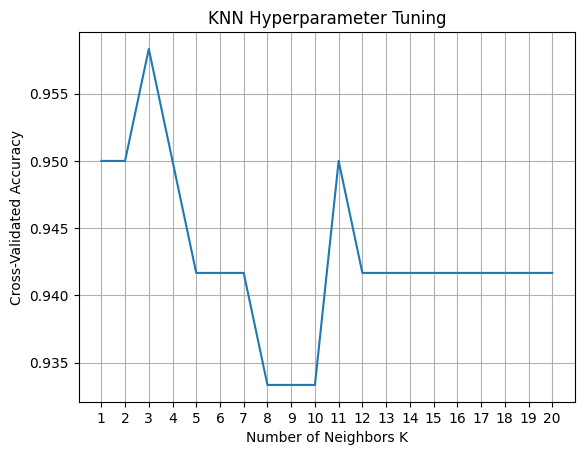

In [5]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Range of k values to test
k_values = range(1, 21)
scores = []

# Perform cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    scores.append(np.mean(cv_scores))

# Find the best k
best_k = k_values[np.argmax(scores)]
print(f'The best number of neighbors is: {best_k}')

# Plotting the results
plt.plot(k_values, scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.xticks(k_values)  # Show all k values on the x-axis
plt.grid()
plt.show()

I will then initialize the **classifier**

This parameter specifies the number of nearest neighbors to consider when making predictions. In this case, the model will look at the 3 closest data points in the training set to determine the class of a new data point.

In [6]:
# training the KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### **1.4 Making Predictions**

In [7]:
y_pred = knn.predict(X_test)

#### **Displaying the Confusion Matrix**

The confusion matrix typically has four components:

- **True Positives (TP)**: The number of instances correctly predicted as positive.
- **True Negatives (TN)**: The number of instances correctly predicted as negative.
- **False Positives (FP)**: The number of instances incorrectly predicted as positive (also known as Type I error).
- **False Negatives (FN)**: The number of instances incorrectly predicted as negative (also known as Type II error).

We should enter a code snippet that computes the confusion matrix for the KNN model's predictions, creates a visual representation of it, and displays the results.

This visualization will help in understanding how many instances were correctly or incorrectly classified for each class, providing valuable insights into the model's strengths and weaknesses.

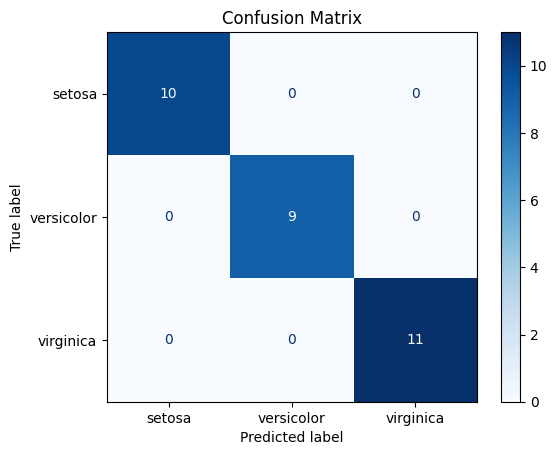

In [8]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### **1.5 Compute Performance Metrics**

I will first calculate the accuracy of the KNN model, usually in theory it's

$\frac{TP + TN}{Total}$

Then I will generate a detailed classification report that provides additional performance metrics

Then finally, I will print out the accuracy mmodel and the detailed classification report

In [9]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### **2. Naive Bayes**
**Definition:** This is a family of probabilistic algorithms based on Bayes' theorem, used primarily for classification tasks. It is called "naive" because it makes a simplifying assumption that the features (or predictors) are conditionally independent given the class label. This means that the presence of one feature does not affect the presence of another feature within the same class.

Steps for Naive Bayes Classification
1. **Import Libraries:** Import the necessary libraries for data manipulation, modeling, and evaluation.

2. **Load the Dataset:** I already loaded it into a data frame

3. **Split the Dataset:** I already split the data into training and testing sets

4. **Train the Model:** Instantiate the Naive Bayes classifier and fit it to the training data.

5. **Make Predictions:** Use the trained model to make predictions on the test set.

6. **Display the Confusion Matrix:** Generate and visualize the confusion matrix to evaluate the model's predictions.

7. **Compute Performance Metrics:** Calculate accuracy, precision, recall, F1-score, and any other relevant metrics.

#### **2.1 Import Libraries**

The only library we need to add is *GaussianNB*:

`GaussianNB` is an implementation of the Gaussian Naive Bayes algorithm, which is a probabilistic classifier based on Bayes' theorem. It assumes that the features follow a normal (Gaussian) distribution.

In [10]:
# additional import of the Gaussian Naive Bayes classifier library
from sklearn.naive_bayes import GaussianNB

Since steps `2.2` & `2.3` have been completed in the KNN classification we move on to `2.4`

#### **2.4 Training the model**
- I will initialize a new model object `nb_model` that will hold the parameters and methods necessary for training and making predictions with the Naive Bayes algorithm

- Then we will train the Naive Bayes model using the training dataset

In [11]:
nb_model = GaussianNB()  # Instantiate the Naive Bayes classifier
nb_model.fit(X_train, y_train)  # Fit the model to the training data

GaussianNB()

#### **2.5 Making Predictions**

We will use the trained Naive Bayes model to make predictions on the test dataset

We can't skip this step because the previos `y_pred` variable stored the predictions for the KNN classification, hence we need to regenerate the predictions accordingly.

In [12]:
y_pred = nb_model.predict(X_test)  # Predict on the test set

#### **2.6 Displaying the Confusion Matrix**

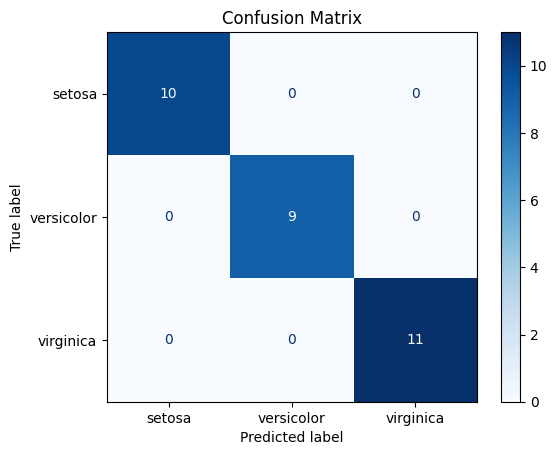

In [13]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### **2.7 Computing Performance Metrics**

In [15]:
# Compute Performance Metrics
accuracy = accuracy_score(y_test, y_pred) # Sum of Correct Predictions / Total Number of Predictions
report = classification_report(y_test, y_pred, target_names=iris.target_names) # summarizes the metrics for each class
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # True Negatives / (True Negatives + False Positives)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)
print(f'Specificity: {specificity:.2f}')

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Specificity: 1.00
